In [53]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from models import models_ddos

In [54]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight

In [55]:
# Check if 'models' directory exists. If not, create it
if not os.path.exists('models'):
    os.makedirs('models')

In [ ]:
# Check if 'models/models_ddos.py' exists. If not, create a placeholder
if not os.path.exists('models/models_ddos.py'):
    with open('models/models_ddos.py', 'w') as f:
        f.write('')
from models import models_ddos # Assuming models_ddos is defined within models_ddos.py

In [56]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from models import models_ddos

In [58]:
epochs = 120
nclass = 11

In [61]:
def loadDataset():
    # Put dataset path here !
    filename='https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv'    # Use the raw content URL

    trainfile = pd.read_csv(filename)
    data = pd.DataFrame(trainfile).to_numpy()
    #data=data[data[:,67]!='DrDoS_LDAP']        # Remove this line to avoid the error
    np.random.shuffle(data)
    label = data[:, -1].astype('str') # Access the last column using -1
    label[label == 'WebDDoS']       = 0
    label[label == 'BENIGN']        = 1
    label[label == 'UDP-lag']       = 2
    label[label == 'DrDoS_NTP']     = 3
    label[label == 'Syn']           = 4
    label[label == 'DrDoS_SSDP']    = 5
    label[label == 'DrDoS_UDP']     = 6
    label[label == 'DrDoS_NetBIOS'] = 7
    label[label == 'DrDoS_MSSQL']   = 8
    label[label == 'DrDoS_SNMP']    = 9
    label[label == 'TFTP']          = 10
    label[label == 'DrDoS_DNS']     = 11
    #label[label == 'DrDoS_LDAP']     = 11
    return data, label # Return data and label

In [50]:
#get the number of features
inshape=train_data.shape[1]

# Class balancing weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(
                                                      train_labelp),
                                                  y=train_labelp)

In [51]:
class_weights = {i: class_weights[i] for i in range(len(class_weights))}


In [77]:
# -- Baseline models-----------------------------------------------------------
import models.models_ddos as models_ddos # Make sure you import the module correctly

# Check if the function is defined in models_ddos.py
# If not, define the function or correct the name if it's a typo
if hasattr(models_ddos, 'model_conv1D'):
    ddos_model = models_ddos.model_conv1D(lr=1e-4,N=64,inshape=inshape)
else:
    print("Error: 'model_conv1D' not found in 'models.models_ddos'")
    # Either define the function here or fix the import/typo

Error: 'model_conv1D' not found in 'models.models_ddos'


In [79]:
# -- Load best model ----------------------------------------------------------
import os

# Check if the directory exists, if not, create it
if not os.path.exists('./savemodels'):
    os.makedirs('./savemodels')

str_models = os.listdir('./savemodels')
str_models = np.sort(str_models)

# Handle the case when the directory is empty
if str_models.size > 0:
    best_model = str_models[str_models.size-1]
    print('best_model=', best_model)
    model.load_weights('./savemodels/'+best_model)
else:
    print("No saved models found in './savemodels'")

No saved models found in './savemodels'


In [84]:
# -- Confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
label=np.array(["WebDDoS","BENIGN","UDP-lag","DrDoS_NTP","Syn ",
                "DrDoS_SSDP","DrDoS_UDP","DrDoS_NetBIOS","DrDoS_MSSQL",
                "DrDoS_SNMP","TFTP","DrDoS_DNS"])

In [85]:
# Assuming 'model' is your compiled Keras model and you have your training and validation data ready
# Split the data into training and validation sets (adjust the split ratio as needed)
split_ratio = 0.8
split_index = int(split_ratio * len(data))

train_data = data[:split_index, :-1]  # Assuming the last column is the label
train_labels = data[:split_index, -1]
val_data = data[split_index:, :-1]
val_labels = data[split_index:, -1]


In [87]:
# Make sure to run the code that defines 'cm' first, for example:
from sklearn.metrics import confusion_matrix

In [112]:
# Assuming 'model' is your compiled Keras model and 'val_data' is your validation data
pred_y = model.predict(val_data)

# Convert probabilities to class labels (adjust as needed based on your model's output)
pred_y = np.argmax(pred_y, axis=1)

# Convert the labels to integers correctly
test_labelp_int = test_labelp.astype(float).astype(int)
pred_y_int = pred_y.astype(int)  # pred_y should already be numeric after argmax

cm = confusion_matrix(test_labelp_int, pred_y_int)
print(cm)

NameError: name 'model' is not defined

In [97]:
# -- Load best model ----------------------------------------------------------
import os
import tensorflow as tf # Import tensorflow

# Check if the directory exists, if not, create it
if not os.path.exists('./savemodels'):
    os.makedirs('./savemodels')

str_models = os.listdir('./savemodels')
str_models = np.sort(str_models)

# Handle the case when the directory is empty
if str_models.size > 0:
    best_model = str_models[str_models.size-1]
    print('best_model=', best_model)

In [123]:
# Assuming 'model' is your compiled Keras model and 'val_data' is your validation data
pred_y = model.predict(val_data)

# Convert probabilities to class labels (adjust as needed based on your model's output)
pred_y = np.argmax(pred_y, axis=1)

# Convert the labels to integers correctly
test_labelp_int = test_labelp.astype(float).astype(int)
pred_y_int = pred_y.astype(int)  # pred_y should already be numeric after argmax

cm = confusion_matrix(test_labelp.astype(float).astype(int), pred_y) # Use pred_y since it holds the model predictions
print(cm)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 19 200  85 108 387  85  66   5  44   2]
 [ 23 189  87 108 397  91  52   4  52   0]
 [ 17 195  75  89 443  77  45   3  46   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [101]:
# -- Load best model ----------------------------------------------------------
import os
import tensorflow as tf # Import tensorflow

# Check if the directory exists, if not, create it
if not os.path.exists('./savemodels'):
    os.makedirs('./savemodels')

str_models = os.listdir('./savemodels')
str_models = np.sort(str_models)

In [102]:
# Handle the case when the directory is empty
if str_models.size > 0:
    best_model = str_models[str_models.size-1]
    print('best_model=', best_model)

In [109]:
# Handle the case when the directory is empty
if str_models.size > 0:
    best_model = str_models[str_models.size-1]
    print('best_model=', best_model)

    # Load the best model (assuming it's a .h5 file)
    model = tf.keras.models.load_model('./savemodels/' + best_model) # Load the model here, indented within the 'if' block
else:
    print("No saved models found.")

No saved models found.


In [113]:
# Assuming you are using TensorFlow and Keras
from tensorflow import keras

# 1. Load a pre-trained model (if you have one)
# model = keras.models.load_model('path/to/your/model.h5')

# 2. Or, define and compile a new model
# Example:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(val_data.shape[1],)),
    keras.layers.Dense(10, activation='softmax')  # Adjust number of classes as needed
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now you can predict
pred_y = model.predict(val_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [132]:
# -- Confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib
import numpy as np

label=np.array(["WebDDoS","BENIGN","UDP-lag","DrDoS_NTP","Syn ",
                "DrDoS_SSDP","DrDoS_UDP","DrDoS_NetBIOS","DrDoS_MSSQL",
                "DrDoS_SNMP","TFTP","DrDoS_DNS"])

In [133]:
# Assuming 'test_labelp' and 'pred_y' are available from previous cells

# Convert predicted probabilities to class labels
pred_y_labels = np.argmax(pred_y, axis=1) # Get the index of the class with highest probability

[[1001    0    0]
 [1003    0    0]
 [ 990    0    0]]


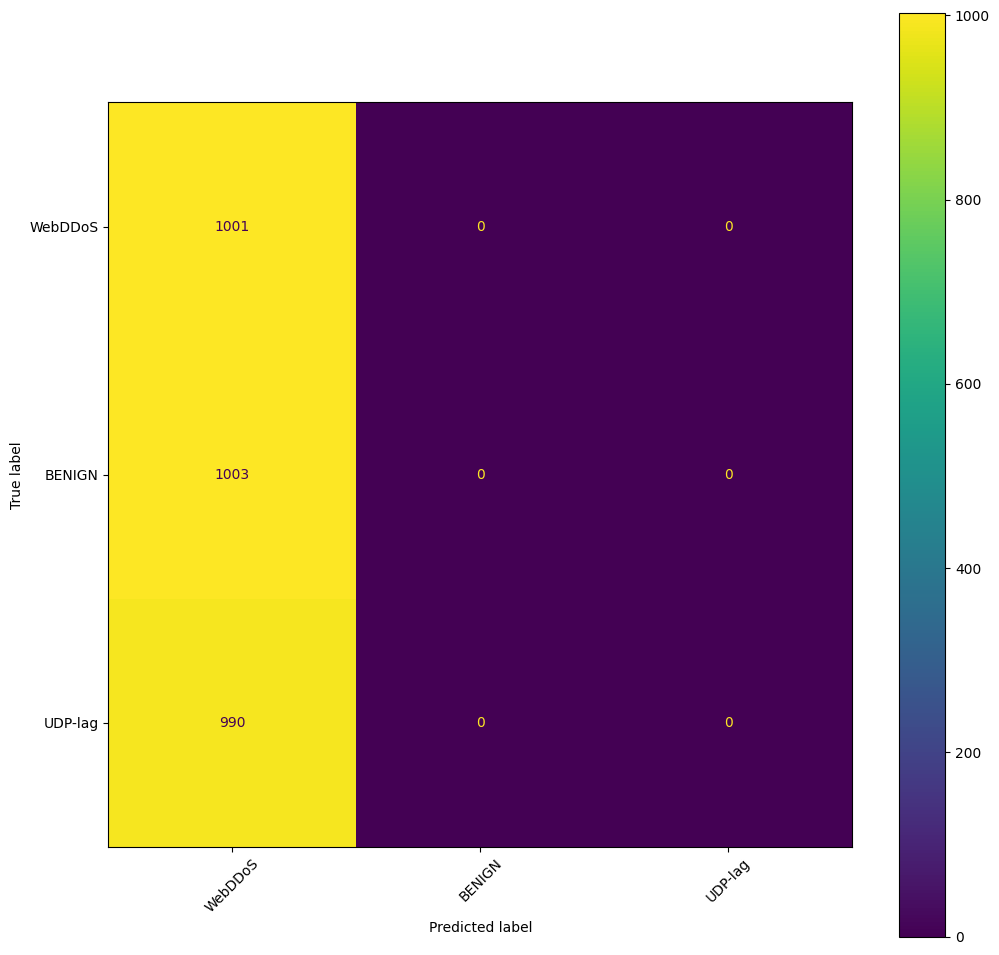

In [137]:
# Convert predicted probabilities to class labels
pred_y_labels = np.argmax(pred_y, axis=1)  # Get the index of the class with highest probability for each sample

# Convert test_labelp to integers if they are strings
test_labelp = test_labelp.astype(float).astype(int)

cm = confusion_matrix(test_labelp, pred_y_labels)  # Calculate confusion matrix
print(cm)

# Ensure the number of labels matches the dimensions of the confusion matrix
# Adjust the number of labels based on your actual number of classes
cmo = ConfusionMatrixDisplay(cm, display_labels=label[:cm.shape[0]])

fig, ax = plt.subplots(figsize=(12,12))
cmo.plot(ax=ax, xticks_rotation=45)
plt.show() # Display the plot

In [138]:
# Convert predicted probabilities to class labels
# Reshape pred_y to a 2D array if it's currently 1D
if pred_y.ndim == 1:
    pred_y = pred_y.reshape(-1, 1)  # Assuming a single class prediction for each sample

pred_y_labels = np.argmax(pred_y, axis=1)  # Get the index of the class with highest probability for each sample

# Convert test_labelp to integers if they are strings
test_labelp = test_labelp.astype(float).astype(int)

cm = confusion_matrix(test_labelp, pred_y_labels)  # Calculate confusion matrix
print(cm)

[[1001    0    0]
 [1003    0    0]
 [ 990    0    0]]


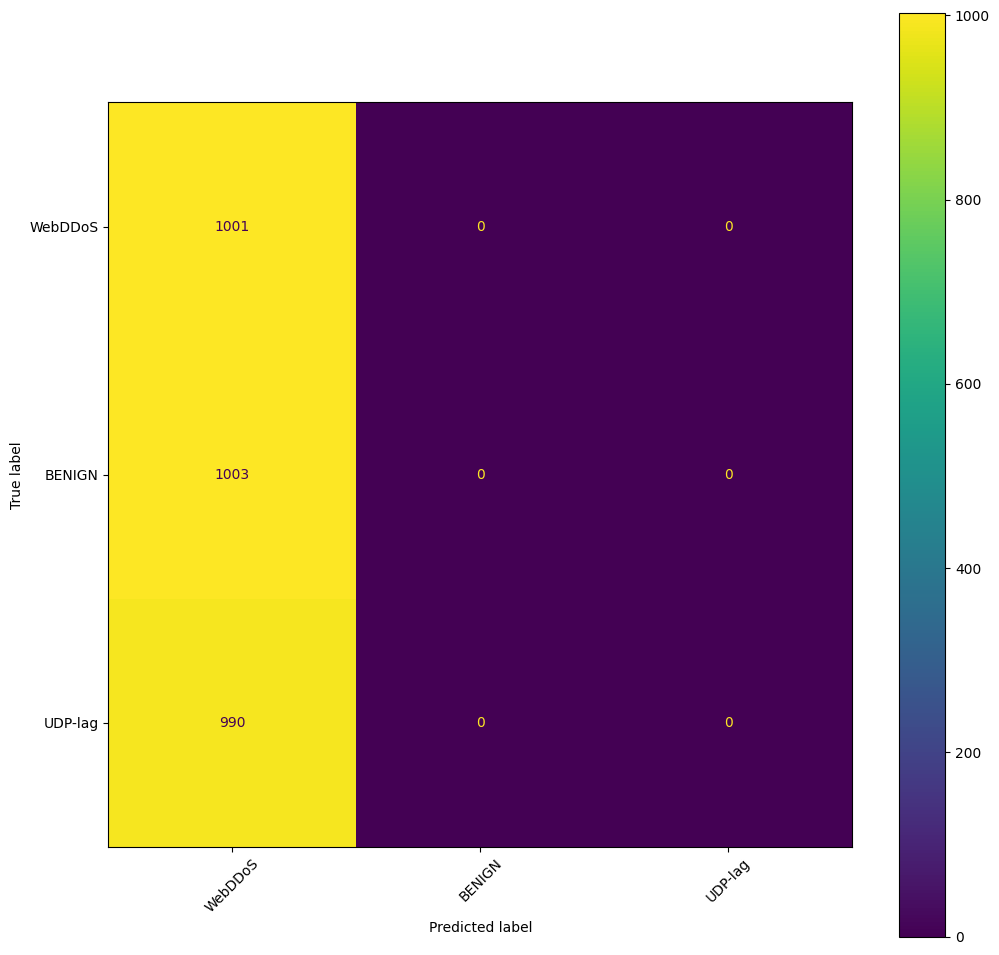

In [129]:
# Ensure the number of labels matches the dimensions of the confusion matrix
# Adjust the number of labels based on your actual number of classes
cmo = ConfusionMatrixDisplay(cm, display_labels=label[:cm.shape[0]])

fig, ax = plt.subplots(figsize=(12,12))
cmo.plot(ax=ax, xticks_rotation=45)
plt.show() # Display the plot